In [1048]:
#Qeura_data
# Descriptive Statistics
# Expert request
# Hypothesis 2 (Team_data)

In [1049]:
import mysql.connector
import pandas as pd

username = 'root'
user_password = '@Mg89141379@'

cnx = mysql.connector.connect(
    user=username,
    password=user_password,
    host='localhost',
    database='football_data_qeura'
)


cursor = cnx.cursor()

query = "SELECT table_name FROM information_schema.tables WHERE table_schema = 'football_data_qeura'"
cursor.execute(query)


results = cursor.fetchall()

# Loop through the table names and create DataFrames for each table
dfs = {}
for row in results:
    table_name = row[0]
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", cnx)
    dfs[table_name] = df
cursor.close()
cnx.close()


for table_name, df in dfs.items():
    print(f"Table Name: {table_name}")
   # print(df)
  #  print()
dfs['players_season']

C:\Users\mehrs\AppData\Local\Temp\ipykernel_2028\2357784847.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(f"SELECT * FROM {table_name}", cnx)


Table Name: clubs
Table Name: clubs_season
Table Name: competitions
Table Name: national
Table Name: players
Table Name: players_season
Table Name: transfers


,id,player_id,season,club_id,squad,appearance,point_per_goal,goals,assits,own_goals,...,goals_conceded,clean_sheets,minutes_per_goal,minutes_played,competition,age,position,height,current_international,agent
0,1,305686,2022,NaN,33.0,24.0,1.58,NaN,NaN,NaN,...,NaN,NaN,NaN,586.0,None,25.0,Central Midfield,185.0,None,None
1,2,305686,2021,NaN,1.0,0.0,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,25.0,Central Midfield,185.0,None,None
2,3,305686,2021,NaN,25.0,22.0,1.41,1.0,NaN,NaN,...,NaN,NaN,809.0,809.0,None,25.0,Central Midfield,185.0,None,None
3,4,305686,2020,NaN,3.0,2.0,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,77.0,None,25.0,Central Midfield,185.0,None,None
4,5,305686,2020,NaN,2.0,2.0,1.50,NaN,NaN,NaN,...,NaN,NaN,NaN,99.0,None,25.0,Central Midfield,185.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257082,257083,5578,2000,595.0,2.0,2.0,1.50,NaN,NaN,NaN,...,2.0,NaN,NaN,180.0,None,42.0,Goalkeeper,185.0,None,None
257083,257084,5578,1999,595.0,20.0,3.0,0.33,NaN,NaN,NaN,...,5.0,NaN,NaN,270.0,None,42.0,Goalkeeper,185.0,None,None
257084,257085,5578,1999,595.0,1.0,0.0,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,None,42.0,Goalkeeper,185.0,None,None
257085,257086,5578,1998,595.0,6.0,1.0,0.00,NaN,NaN,NaN,...,1.0,NaN,NaN,70.0,None,42.0,Goalkeeper,185.0,None,None


In [1050]:
dfs['clubs_season']
dfs['players_season']
dfs['clubs_season'] = dfs['clubs_season'].loc[dfs['clubs_season']['competition_id'].isin(['ligue-1', 'laliga','serie-a','premier-league','bundesliga'])]
temp = dfs['players_season']
temp = temp[temp['season'] == 2021] 
temp_club = dfs['clubs_season']
temp_club = temp_club[temp_club['season'] == 2021] 
temp_club

,id,club_id,season,competition_id,rank,matches,win,draw,loss,goals_scored,goals_conceded,players_avg_age
36,37,583,2021,ligue-1,1,None,None,None,None,None,None,None
58,59,5,2021,serie-a,1,None,None,None,None,None,None,None
75,76,418,2021,laliga,1,None,None,None,None,None,None,None
108,109,281,2021,premier-league,1,None,None,None,None,None,None,None
154,155,27,2021,bundesliga,1,None,None,None,None,None,None,None


In [1051]:
merged_df = pd.merge(temp,temp_club,on = 'club_id')
merged_df

,id_x,player_id,season_x,club_id,squad,appearance,point_per_goal,goals,assits,own_goals,...,season_y,competition_id,rank,matches,win,draw,loss,goals_scored,goals_conceded_y,players_avg_age
0,1921,344600,2021,27.0,6.0,1.0,3.00,NaN,NaN,NaN,...,2021,bundesliga,1,None,None,None,None,None,None,None
1,1922,344600,2021,27.0,3.0,0.0,0.00,NaN,NaN,NaN,...,2021,bundesliga,1,None,None,None,None,None,None,None
2,1923,344600,2021,27.0,1.0,1.0,3.00,1.0,1.0,NaN,...,2021,bundesliga,1,None,None,None,None,None,None,None
3,7528,159471,2021,27.0,34.0,34.0,2.26,14.0,5.0,NaN,...,2021,bundesliga,1,None,None,None,None,None,None,None
4,7529,159471,2021,27.0,8.0,8.0,2.13,3.0,1.0,NaN,...,2021,bundesliga,1,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,245315,339808,2021,5.0,4.0,4.0,1.75,NaN,3.0,NaN,...,2021,serie-a,1,None,None,None,None,None,None,None
557,245316,339808,2021,5.0,5.0,5.0,0.80,NaN,1.0,NaN,...,2021,serie-a,1,None,None,None,None,None,None,None
558,249054,582302,2021,5.0,1.0,0.0,0.00,NaN,NaN,NaN,...,2021,serie-a,1,None,None,None,None,None,None,None
559,250318,698548,2021,5.0,4.0,0.0,0.00,NaN,NaN,NaN,...,2021,serie-a,1,None,None,None,None,None,None,None


In [1052]:
merged_df = merged_df[['squad','appearance','competition_id']]


In [1053]:
#############
# First 
###########

In [1054]:
import pandas as pd
merged_df = merged_df[merged_df['squad'] > 14]

merged_df['percentage'] = (merged_df['appearance'] / merged_df['squad']) *100
# Merge the two dataframes based on player_id and season_id
#merged_df = pd.merge(dfs['players_season'], dfs['clubs_season'], on=['club_id', 'club_id'])[['player_id','squad','appearance']]
merged_df = merged_df.sort_values(by='percentage', ascending=False)

In [1055]:
merged_df.drop_duplicates(inplace=True)
merged_df

,squad,appearance,competition_id,percentage
3,34.0,34.0,bundesliga,100.000000
80,22.0,22.0,bundesliga,100.000000
529,31.0,31.0,serie-a,100.000000
481,32.0,32.0,serie-a,100.000000
453,35.0,35.0,laliga,100.000000
...,...,...,...,...
443,34.0,2.0,laliga,5.882353
226,30.0,1.0,premier-league,3.333333
246,18.0,0.0,premier-league,0.000000
540,29.0,0.0,serie-a,0.000000


In [1056]:
Players_median = merged_df.groupby('competition_id').median()
Players_mean =  merged_df.groupby('competition_id').mean()

In [1057]:
Players_mean

,squad,appearance,percentage
competition_id,,,
bundesliga,25.136364,19.045455,72.787711
laliga,29.500000,21.125000,67.736533
ligue-1,27.086957,20.739130,74.136383
premier-league,32.600000,22.700000,66.475465
serie-a,31.363636,21.954545,69.521227


In [1058]:
Players_median

,squad,appearance,percentage
competition_id,,,
bundesliga,24.5,20.5,90.097403
laliga,30.5,25.0,78.078078
ligue-1,29.0,22.0,82.758621
premier-league,34.0,27.5,77.460317
serie-a,31.5,25.0,87.142857


In [1059]:
merged_df['appearance']= merged_df['appearance'].astype('int')

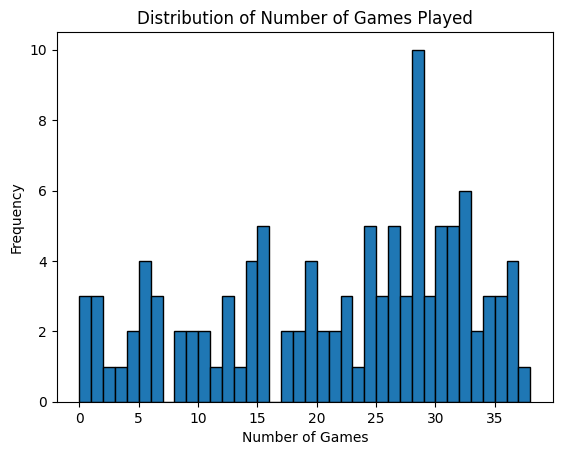

In [1060]:
import matplotlib.pyplot as plt

# Plot the histogram with integer bins
plt.hist(merged_df['appearance'], bins=range(min(merged_df['appearance']), max(merged_df['appearance']) + 2), edgecolor='black')

# Set the labels and title
plt.xlabel('Number of Games')
plt.ylabel('Frequency')
plt.title('Distribution of Number of Games Played')


plt.show()


In [1061]:
#############
# First_2
###########


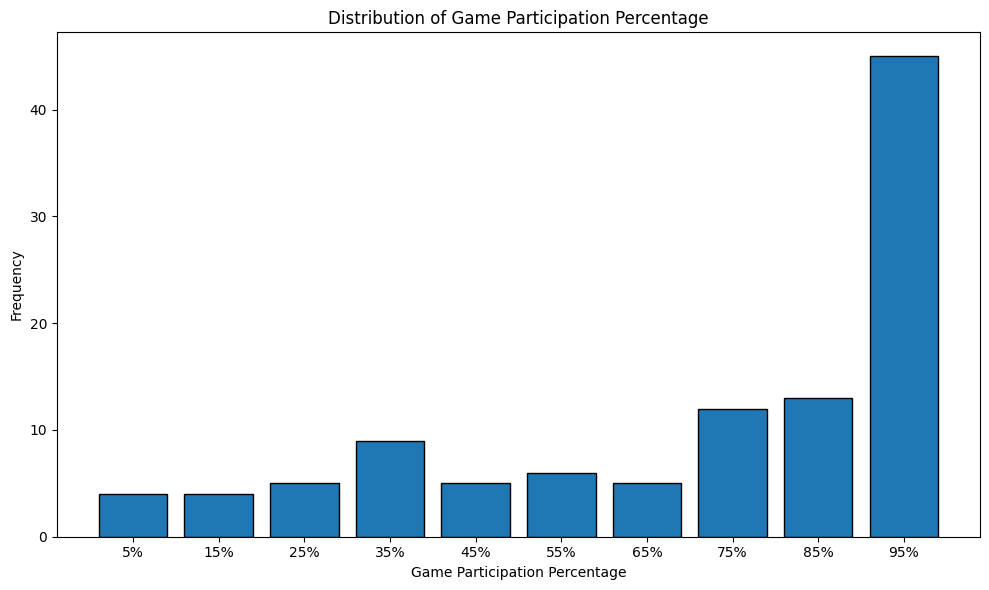

In [1062]:

ranges = np.arange(0, 110, 10)

percentage_counts = pd.cut(merged_df['percentage'], ranges).value_counts().sort_index()

x = np.arange(len(ranges) - 1)
y = percentage_counts.values

plt.figure(figsize=(10, 6))
plt.bar(x, y, align='center', edgecolor='black')

# Set the x-tick labels
plt.xticks(x, labels=ranges[:-1])

plt.xlabel('Game Participation Percentage')
plt.ylabel('Frequency')
plt.title('Distribution of Game Participation Percentage')
group_midpoints = (ranges[:-1] + ranges[1:]) / 2
plt.xticks(x, labels=[f'{midpoint_val:.0f}%' for midpoint_val in group_midpoints])
plt.tight_layout()
plt.show()


In [1063]:
merged_df

,squad,appearance,competition_id,percentage
3,34.0,34,bundesliga,100.000000
80,22.0,22,bundesliga,100.000000
529,31.0,31,serie-a,100.000000
481,32.0,32,serie-a,100.000000
453,35.0,35,laliga,100.000000
...,...,...,...,...
443,34.0,2,laliga,5.882353
226,30.0,1,premier-league,3.333333
246,18.0,0,premier-league,0.000000
540,29.0,0,serie-a,0.000000


In [1064]:
#############
# Second
###########
# valus in players
# goals in player_season
dfs['clubs_season']
dfs['players_season']
dfs['clubs_season'] = dfs['clubs_season'].loc[dfs['clubs_season']['competition_id'].isin(['ligue-1', 'laliga','serie-a','premier-league','bundesliga'])]
temp = dfs['players_season']
temp = temp[temp['season'] == 2021] 

temp_club = dfs['clubs_season']
temp_club = temp_club[temp_club['season'] == 2021] 
temp_club
merged_df = pd.merge(temp,temp_club,on = 'club_id')
merged_df = merged_df[merged_df['squad'] > 14]
merged_df = pd.merge(merged_df,dfs['players'],left_on='player_id',right_on='id')
merged_df = merged_df[['competition_id','player_id','goals','current_value','position_x']]
merged_df

,competition_id,player_id,goals,current_value,position_x
0,bundesliga,159471,14.0,20000000.0,Right Winger
1,bundesliga,58358,8.0,30000000.0,Second Striker
2,bundesliga,467437,NaN,500000.0,Attacking Midfield
3,bundesliga,243714,6.0,65000000.0,Left Winger
4,bundesliga,483046,1.0,400000.0,Right-Back
...,...,...,...,...,...
115,serie-a,22141,NaN,2000000.0,Goalkeeper
116,serie-a,357164,11.0,70000000.0,Left Winger
117,serie-a,55282,NaN,4000000.0,Goalkeeper
118,serie-a,187587,2.0,17000000.0,Left Winger


In [1065]:
correlation = merged_df['goals'].corr(merged_df['current_value'])
print('Linear Correlation:', correlation)

Linear Correlation: 0.13326721573307412


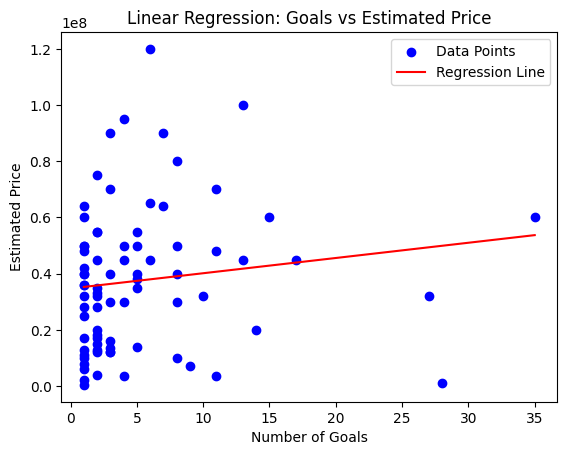

In [1066]:

data = merged_df[['goals', 'current_value']].dropna()

# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(data['goals'], data['current_value'])

# Create a scatter plot of the data points
plt.scatter(data['goals'], data['current_value'], color='b', label='Data Points')


x = np.linspace(data['goals'].min(), data['goals'].max(), 100)
y = slope * x + intercept


plt.plot(x, y, color='r', label='Regression Line')

plt.xlabel('Number of Goals')
plt.ylabel('Estimated Price')
plt.title('Linear Regression: Goals vs Estimated Price')

plt.legend()


plt.show()




In [1067]:
######
## forth
#######


In [1068]:
merged_df['position_x'].unique()

array(['Right Winger', 'Second Striker', 'Attacking Midfield',
       'Left Winger', 'Right-Back', 'Defensive Midfield', 'Centre-Back',
       'Centre-Forward', 'Left-Back', 'Goalkeeper', 'Central Midfield',
       'Right Midfield'], dtype=object)

In [1069]:
#should change the conditon with the real data
merged_df_attack = merged_df.loc[merged_df['position_x'].isin(['Centre-Forward', 'Second Striker'])]


In [1070]:
correlation = merged_df_attack['goals'].corr(merged_df_attack['current_value'])
print('Linear Correlation:', correlation)

Linear Correlation: 0.0029247353801630043


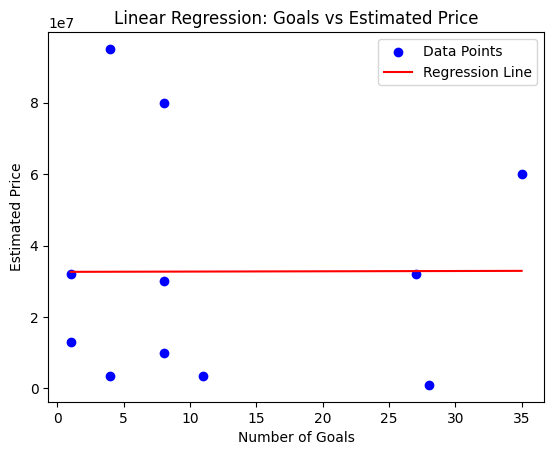

In [1071]:

data = merged_df_attack[['goals', 'current_value']].dropna()

# linear regression
slope, intercept, r_value, p_value, std_err = stats.linregress(data['goals'], data['current_value'])

# Create a scatter plot of the data points
plt.scatter(data['goals'], data['current_value'], color='b', label='Data Points')


x = np.linspace(data['goals'].min(), data['goals'].max(), 100)
y = slope * x + intercept


plt.plot(x, y, color='r', label='Regression Line')

plt.xlabel('Number of Goals')
plt.ylabel('Estimated Price')
plt.title('Linear Regression: Goals vs Estimated Price')

plt.legend()


plt.show()


# ehtemalan bekhate datahaye kami ke darim az bazikon ha

In [1072]:
merged_df

,competition_id,player_id,goals,current_value,position_x
0,bundesliga,159471,14.0,20000000.0,Right Winger
1,bundesliga,58358,8.0,30000000.0,Second Striker
2,bundesliga,467437,NaN,500000.0,Attacking Midfield
3,bundesliga,243714,6.0,65000000.0,Left Winger
4,bundesliga,483046,1.0,400000.0,Right-Back
...,...,...,...,...,...
115,serie-a,22141,NaN,2000000.0,Goalkeeper
116,serie-a,357164,11.0,70000000.0,Left Winger
117,serie-a,55282,NaN,4000000.0,Goalkeeper
118,serie-a,187587,2.0,17000000.0,Left Winger


In [1073]:
#############
# Fifth
###########

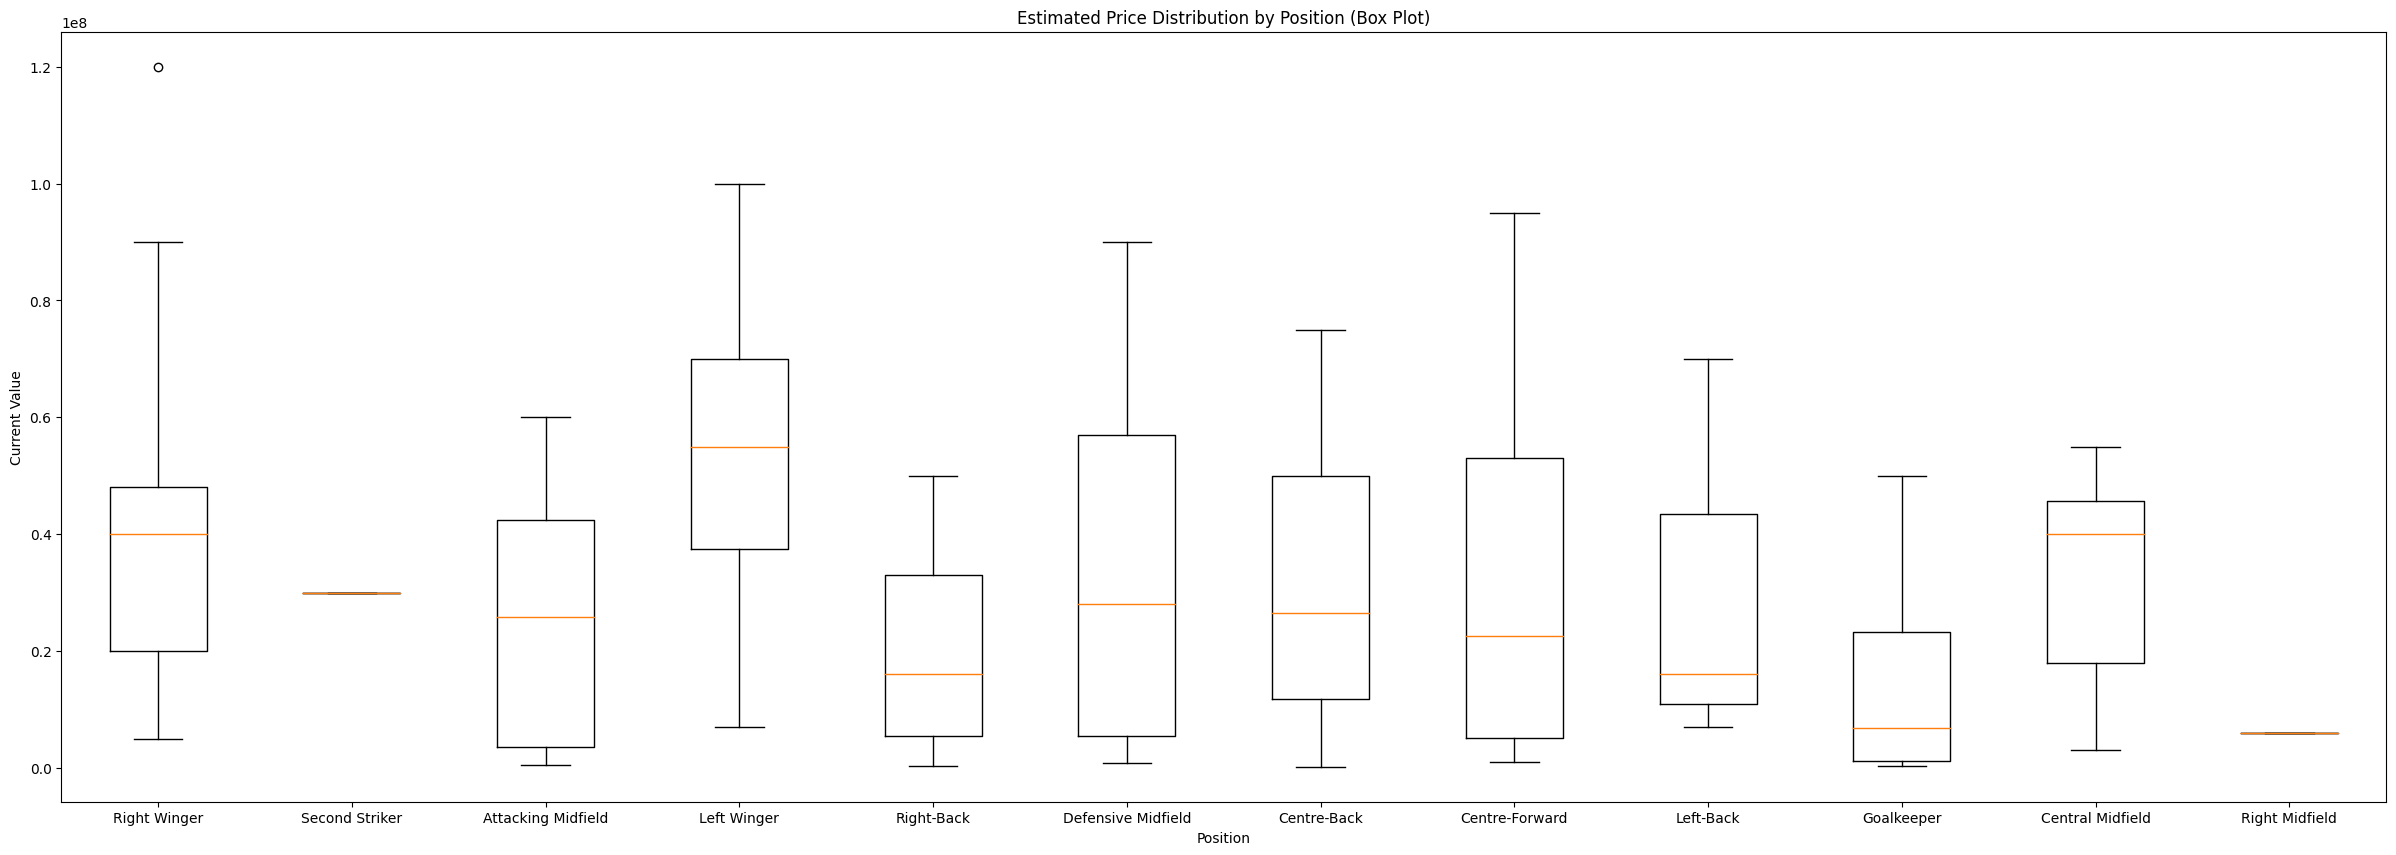

In [1074]:

filtered_data = merged_df.dropna(subset=['current_value'])

data = [filtered_data[filtered_data['position_x'] == pos]['current_value'] for pos in filtered_data['position_x'].unique()]

# Create the box plot
plt.figure(figsize=(30, 10))
plt.boxplot(data, labels=filtered_data['position_x'].unique())

plt.xlabel('Position')
plt.ylabel('Current Value')
plt.title('Estimated Price Distribution by Position (Box Plot)')

plt.show()


In [1075]:
####
# Goals in diffrent leagues
###
merged_df


,competition_id,player_id,goals,current_value,position_x
0,bundesliga,159471,14.0,20000000.0,Right Winger
1,bundesliga,58358,8.0,30000000.0,Second Striker
2,bundesliga,467437,NaN,500000.0,Attacking Midfield
3,bundesliga,243714,6.0,65000000.0,Left Winger
4,bundesliga,483046,1.0,400000.0,Right-Back
...,...,...,...,...,...
115,serie-a,22141,NaN,2000000.0,Goalkeeper
116,serie-a,357164,11.0,70000000.0,Left Winger
117,serie-a,55282,NaN,4000000.0,Goalkeeper
118,serie-a,187587,2.0,17000000.0,Left Winger


In [1076]:
goals_each_leuge = merged_df.groupby('competition_id').sum()['goals']


In [1077]:
goals_each_leuge

competition_id
bundesliga        92.0
laliga            79.0
ligue-1           85.0
premier-league    94.0
serie-a           61.0
Name: goals, dtype: float64

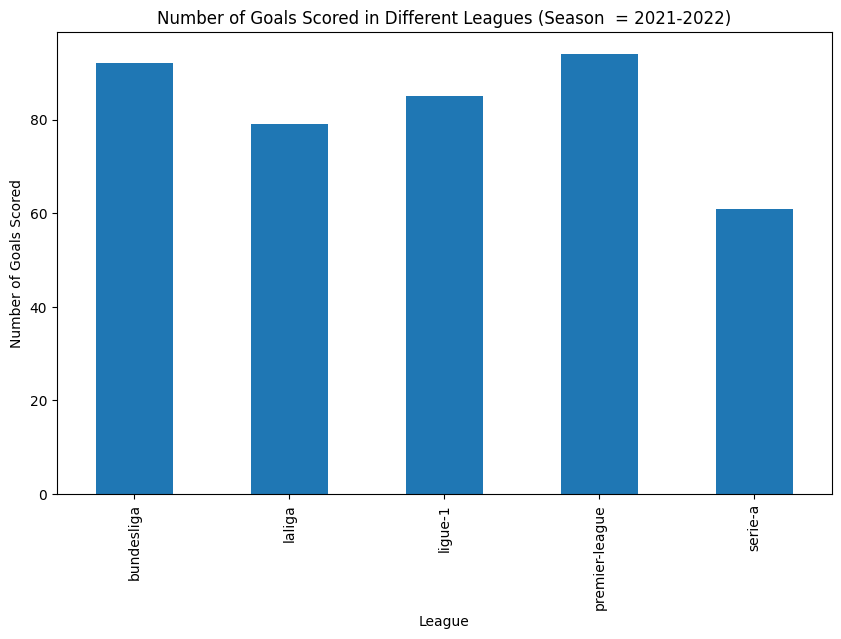

In [1078]:
plt.figure(figsize=(10, 6))
goals_each_leuge.plot(kind='bar')
plt.xlabel('League')
plt.ylabel('Number of Goals Scored')
plt.title('Number of Goals Scored in Different Leagues (Season  = 2021-2022)')
plt.xticks(rotation=90)
plt.show()

In [1079]:
#############
# Sixth
###########


In [1080]:

transfer_merged = dfs['transfers'].merge(dfs['clubs'], left_on='destination_club_id', right_on='id')
transfer_merged = transfer_merged[['destination_club_id','fee','season_x','market_value']]

transfer_merged = transfer_merged[transfer_merged['season_x'] > 2017]
transfer_merged = transfer_merged[transfer_merged['season_x'] < 2023]
transfer_merged = transfer_merged[transfer_merged['fee'] > 0]
transfer_merged = pd.merge(transfer_merged,dfs['clubs'],left_on='destination_club_id',right_on='id')
transfer_merged = transfer_merged[['name','fee','season_x','market_value']]


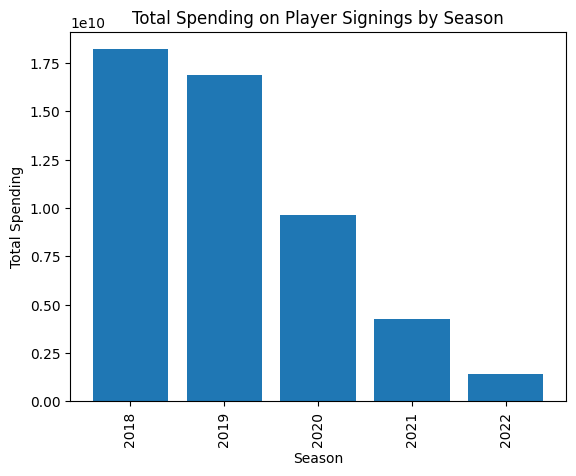

In [1081]:

total_spending_by_season = transfer_merged.groupby('season_x')['fee'].sum()

plt.bar(total_spending_by_season.index, total_spending_by_season.values)

# Set labels and title
plt.xlabel('Season')
plt.ylabel('Total Spending')
plt.title('Total Spending on Player Signings by Season')

plt.xticks(rotation=90);

# wrong data_porbpaly

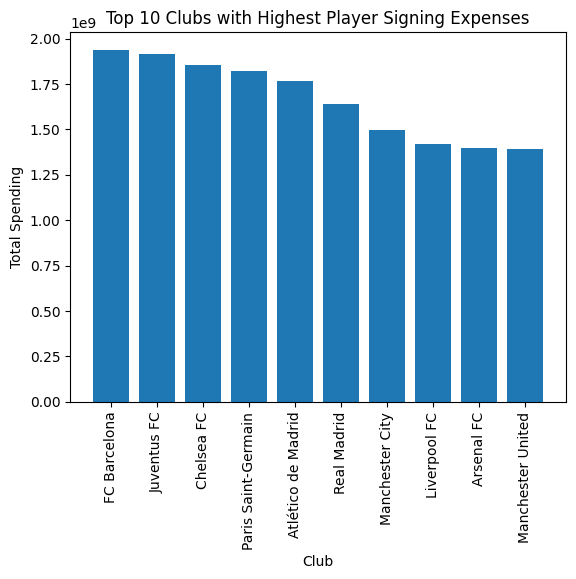

In [1082]:
import pandas as pd
import matplotlib.pyplot as plt

total_spending_by_club = transfer_merged.groupby('name')['fee'].sum()


top_10_clubs = total_spending_by_club.sort_values(ascending=False).head(10)

# Create a bar chart
plt.bar(top_10_clubs.index, top_10_clubs.values)

# Set labels and title
plt.xlabel('Club')
plt.ylabel('Total Spending')
plt.title('Top 10 Clubs with Highest Player Signing Expenses')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the chart
plt.show()


In [1083]:
##############
#### Seventh
###############

In [1084]:
transfer_merged


,name,fee,season_x,market_value
0,RCD Mallorca,2500000.0,2021,2000000.0
1,RCD Mallorca,1500000.0,2019,4000000.0
2,RCD Mallorca,3000000.0,2022,5000000.0
3,RCD Mallorca,3000000.0,2021,2000000.0
4,RCD Mallorca,1700000.0,2020,1500000.0
...,...,...,...,...
4849,US Lecce,1050000.0,2019,3500000.0
4850,US Lecce,300000.0,2018,3200000.0
4851,US Lecce,1000000.0,2019,5200000.0
4852,US Lecce,800000.0,2018,2000000.0


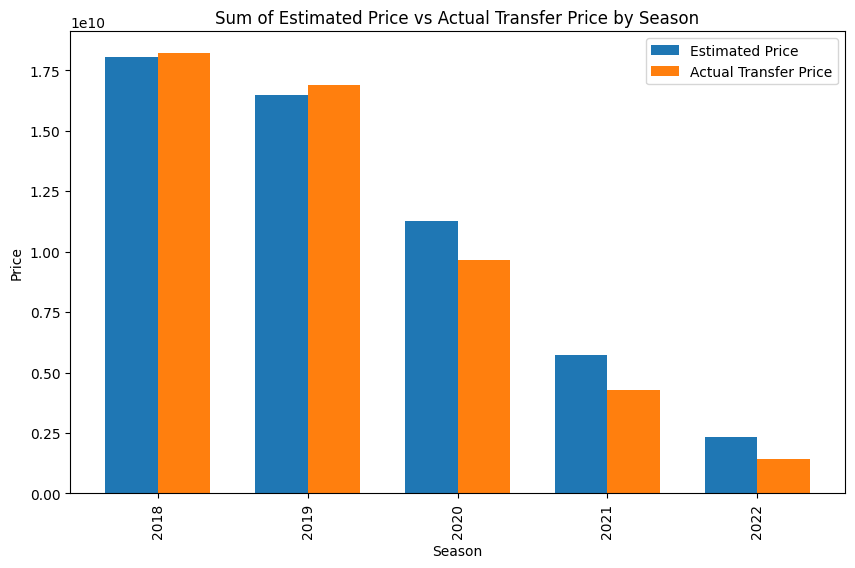

In [1085]:

sum_estimated_price = transfer_merged.groupby('season_x')['market_value'].sum()
sum_actual_price = transfer_merged.groupby('season_x')['fee'].sum()
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
x = range(len(sum_estimated_price))
ax.bar(x, sum_estimated_price, width=bar_width, label='Estimated Price')
ax.bar([i + bar_width for i in x], sum_actual_price, width=bar_width, label='Actual Transfer Price')
ax.set_xticks([i + bar_width/2 for i in x])
ax.set_xticklabels(sum_estimated_price.index)
ax.set_xlabel('Season')
ax.set_ylabel('Price')
ax.set_title('Sum of Estimated Price vs Actual Transfer Price by Season')
ax.legend()
plt.xticks(rotation=90)
plt.show()


In [1086]:
summary_df = pd.DataFrame({'Estimated Price': sum_estimated_price, 'Actual Transfer Price': sum_actual_price})
summary_df['ratio'] = summary_df['Estimated Price'] / summary_df['Actual Transfer Price']
summary_df

,Estimated Price,Actual Transfer Price,ratio
season_x,,,
2018,1.805512e+10,1.819060e+10,0.992552
2019,1.649150e+10,1.688255e+10,0.976837
2020,1.128070e+10,9.635199e+09,1.170780
2021,5.705250e+09,4.280951e+09,1.332706
2022,2.341250e+09,1.442895e+09,1.622606


In [1087]:
###############
#### hypothesis 2
##############
## For this quera_data is not ok
import mysql.connector
import pandas as pd

username = 'root'
user_password = '@Mg89141379@'

cnx = mysql.connector.connect(
    user=username,
    password=user_password,
    host='localhost',
    database='football_data_team'
)


cursor = cnx.cursor()

query = "SELECT table_name FROM information_schema.tables WHERE table_schema = 'football_data_team'"
cursor.execute(query)


results = cursor.fetchall()

# Loop through the table names and create DataFrames for each table
dfs = {}
for row in results:
    table_name = row[0]
    df = pd.read_sql_query(f"SELECT * FROM {table_name}", cnx)
    dfs[table_name] = df
cursor.close()
cnx.close()


for table_name, df in dfs.items():
    print(f"Table Name: {table_name}")
   # print(df)
  #  print()


Table Name: clubs
Table Name: clubs_season
Table Name: competitions
Table Name: national
Table Name: players
Table Name: players_season
Table Name: transfers


C:\Users\mehrs\AppData\Local\Temp\ipykernel_2028\2562638850.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(f"SELECT * FROM {table_name}", cnx)
C:\Users\mehrs\AppData\Local\Temp\ipykernel_2028\2562638850.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(f"SELECT * FROM {table_name}", cnx)


In [1088]:
df = dfs['clubs_season'] 


In [1089]:
df = df[df['season'] > 2019]
df = df[df['season'] < 2022]
df['in_Europe'] = 0

In [1090]:
# Create separate DataFrames for the 2020 and 2021 seasons
df_2020 = df[df['season'] == 2020]
df_2021 = df[df['season'] == 2021]
# france is Top 3 fro cahmpopns_leauge
clubs_in_europe = df_2020[(df_2020['rank'] < 4) & (df_2020['competition_id'] != 'FR1')]['club_id'].unique()

df_2021.loc[df_2021['club_id'].isin(clubs_in_europe), 'in_Europe'] = 1

fr1_clubs_in_europe = df_2020[(df_2020['competition_id'] == 'FR1') & (df_2020['rank'] < 3)]['club_id'].unique()

df_2021.loc[(df_2021['competition_id'] == 'FR1') & df_2021['club_id'].isin(fr1_clubs_in_europe), 'in_Europe'] = 1


df_2021['points'] =df_2021['win'] * 3 + df_2021['draw']

C:\Users\mehrs\AppData\Local\Temp\ipykernel_2028\1120127677.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2021['points'] =df_2021['win'] * 3 + df_2021['draw']


In [1091]:
non_qualified_mean_wins

goals_scored      43.411765
goals_conceded    49.352941
points            47.000000
dtype: float64

In [1092]:

qualified_teams = df_2021[df_2021['in_Europe'] == 1]

qualified_mean_wins = qualified_teams.groupby('competition_id')[['win','draw','loss','goals_scored','goals_conceded','points']].mean()

non_qualified_teams = df_2021[df_2021['in_Europe'] == 0]

non_qualified_mean_wins = non_qualified_teams.groupby('competition_id')[['win','draw','loss','goals_scored','goals_conceded','points']].mean()


In [1093]:
qualified_mean_wins

,win,draw,loss,goals_scored,goals_conceded,points
competition_id,,,,,,
ES1,22.666667,8.666667,6.666667,71.000000,37.333333,76.666667
FR1,20.000000,10.500000,7.500000,69.000000,42.000000,70.500000
GB1,24.333333,8.000000,5.666667,83.333333,36.333333,81.000000
IT1,22.333333,9.333333,6.333333,72.666667,37.000000,76.333333
L1,21.000000,5.000000,8.000000,84.666667,42.000000,68.000000


In [1094]:
for column in qualified_mean_wins.columns:
    if(column=='win' or column=='draw' or column == 'loss'):
        continue
      
    qualified_mean = qualified_mean_wins[column]
    non_qualified_mean = non_qualified_mean_wins[column]
    
    _, p_value = ttest_ind(qualified_mean, non_qualified_mean, equal_var=False)
    
    
    alpha = 0.01
    
    if p_value < alpha:
        print(f"The performance of qualified teams in terms of {column} is significantly better than non-qualified teams.")
    else:
        print(f"The performance of qualified teams in terms of {column} is not significantly different from non-qualified teams.")

The performance of qualified teams in terms of goals_scored is significantly better than non-qualified teams.
The performance of qualified teams in terms of goals_conceded is significantly better than non-qualified teams.
The performance of qualified teams in terms of points is significantly better than non-qualified teams.


In [1095]:
mean_wins_combined = pd.concat([qualified_mean_wins, non_qualified_mean_wins], keys=['Qualified', 'Non-Qualified'])

In [1096]:
mean_wins_combined

win       draw       loss  goals_scored   
              competition_id                                                  
Qualified     ES1             22.666667   8.666667   6.666667     71.000000  \
              FR1             20.000000  10.500000   7.500000     69.000000   
              GB1             24.333333   8.000000   5.666667     83.333333   
              IT1             22.333333   9.333333   6.333333     72.666667   
              L1              21.000000   5.000000   8.000000     84.666667   
Non-Qualified ES1             11.823529  11.529412  14.647059     43.411765   
              FR1             13.222222  10.166667  14.611111     51.611111   
              GB1             12.882353   8.941176  16.176471     48.294118   
              IT1             12.647059   9.882353  15.470588     51.235294   
              L1              11.333333   8.733333  13.933333     46.666667   

                              goals_conceded     points  
              competition_id                             
Qualified     ES1                  37.333333  76.666667  
              FR1                  42.000000  70.500000  
              GB1                  36.333333  81.000000  
              IT1                  37.000000  76.333333  
              L1                   42.000000  68.000000  
Non-Qualified ES1                  49.352941  47.000000  
              FR1                  54.611111  49.833333  
              GB1                  56.588235  47.588235  
              IT1                  57.529412  47.823529  
              L1                   55.200000  42.733333

In [1097]:
### Goals_scored and  goals_conceded and points to copmare teams


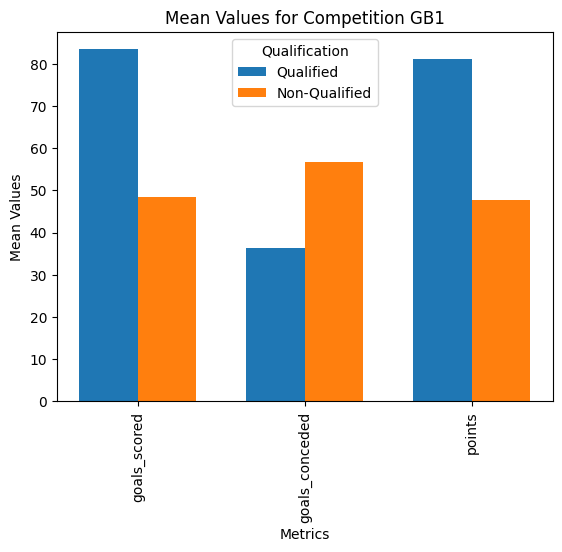

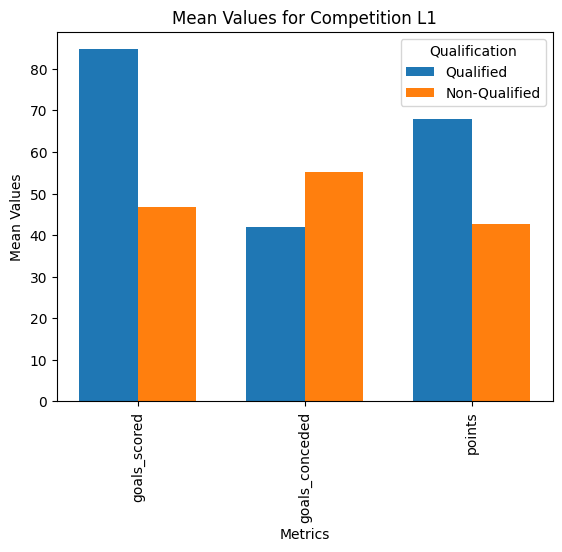

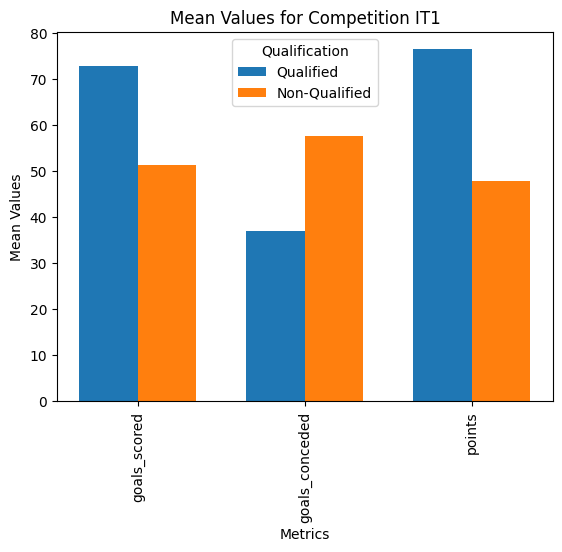

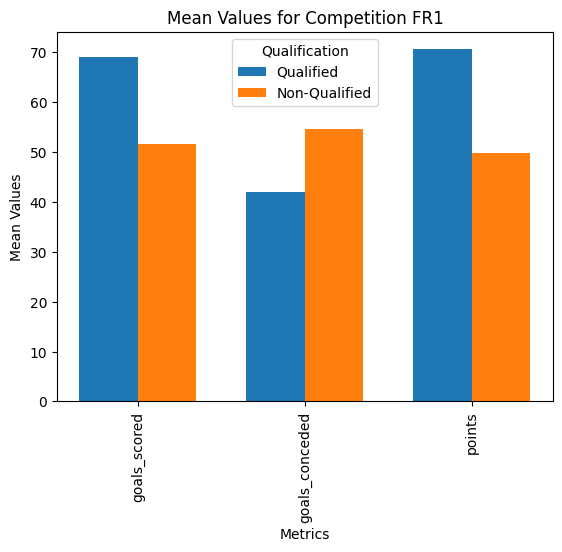

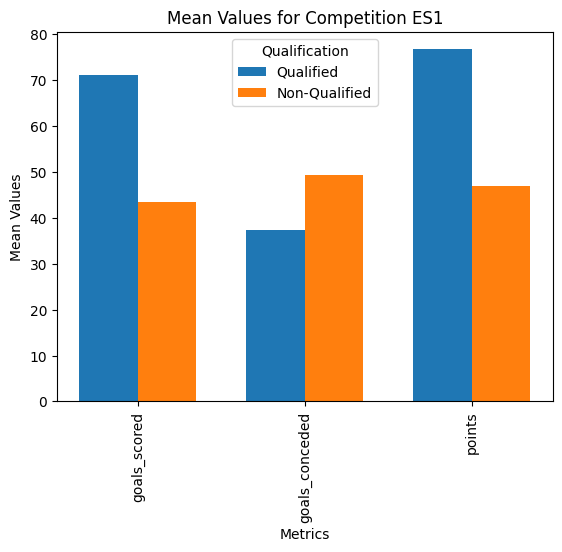

In [1098]:
compare = []

competition_ids = df_2021['competition_id'].unique()

bar_width = 0.35

for competition_id in competition_ids:
    di = {}
    qualified_mean_wins = qualified_teams[qualified_teams['competition_id'] == competition_id]
    qualified_mean_wins = qualified_mean_wins[[ 'goals_scored', 'goals_conceded','points']].mean()

    non_qualified_mean_wins = non_qualified_teams[non_qualified_teams['competition_id'] == competition_id]
    non_qualified_mean_wins = non_qualified_mean_wins[['goals_scored', 'goals_conceded','points']].mean()
    
    indices = np.arange(len(qualified_mean_wins))

    plt.figure()
    plt.bar(indices, qualified_mean_wins, width=bar_width, label='Qualified')
    plt.bar(indices + bar_width, non_qualified_mean_wins, width=bar_width, label='Non-Qualified')
    plt.xlabel('Metrics')
    plt.ylabel('Mean Values')
    plt.title(f'Mean Values for Competition {competition_id}')
    plt.legend(title='Qualification')
    plt.xticks(indices + bar_width / 2, qualified_mean_wins.index)
    plt.xticks(rotation=90)
    plt.show()
